<a href="https://colab.research.google.com/github/SamuelRoblesArce/Proyectos-de-BI/blob/main/BI_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Curso de Visualizaciones/PC/imdb_movies.csv')

In [ ]:
df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [ ]:
df.shape

(10178, 12)

In [ ]:
df.dtypes

,0
names,object
date_x,object
score,float64
genre,object
overview,object
crew,object
orig_title,object
status,object
orig_lang,object
budget_x,float64


# Limpieza de Nulos

In [ ]:
df.isnull().sum()

,0
names,0
date_x,0
score,0
genre,85
overview,0
crew,56
orig_title,0
status,0
orig_lang,0
budget_x,0


In [ ]:
df_cleaned = df.dropna()
df_cleaned.isnull().sum()

,0
names,0
date_x,0
score,0
genre,0
overview,0
crew,0
orig_title,0
status,0
orig_lang,0
budget_x,0


# Análisis de duplicados

In [ ]:
df_cleaned[['names']].duplicated().sum()

np.int64(514)

In [ ]:
df_cleaned[['names', 'score', 'revenue']].duplicated().sum()

np.int64(11)

In [ ]:
df_cleaned[['names', 'score', 'revenue','date_x']].duplicated().sum()

np.int64(0)

In [ ]:
df_cleaned[['names','score','date_x']].duplicated().sum()

np.int64(179)

In [ ]:
df_cleaned[['names','date_x','crew']].duplicated().sum()

np.int64(179)

In [ ]:
# prompt: quiero ver quienes son estas peliculas df_cleaned[['names','date_x','crew']].duplicated().sum()

df_cleaned[df_cleaned[['names','date_x','crew']].duplicated(keep=False)]

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,overview_tokens,crew_tokens
95,Scream,01/13/2022,67.0,"Horror, Mystery, Thriller",Twenty-five years after a streak of brutal mur...,"Melissa Barrera, Sam Carpenter, Mason Gooding,...",Scream,Released,English,24000000.0,1.388748e+08,AU,"[year, streak, brutal, murder, shocked, quiet,...","[melissa, barrera, sam, carpenter, mason, good..."
96,Scream,01/13/2022,67.0,"Horror, Mystery, Thriller",Twenty-five years after a streak of brutal mur...,"Melissa Barrera, Sam Carpenter, Mason Gooding,...",Scream,Released,English,15000000.0,1.730466e+08,AU,"[year, streak, brutal, murder, shocked, quiet,...","[melissa, barrera, sam, carpenter, mason, good..."
109,The Ten Commandments,12/12/1958,78.0,"Drama, History","Escaping death, a Hebrew infant is raised in a...","Charlton Heston, Moses, Yul Brynner, Rameses, ...",The Ten Commandments,Released,English,13500000.0,8.543393e+07,AU,"[escaping, death, hebrew, infant, raised, roya...","[charlton, heston, moses, yul, brynner, ramese..."
110,The Ten Commandments,12/12/1958,78.0,"Drama, History","Escaping death, a Hebrew infant is raised in a...","Charlton Heston, Moses, Yul Brynner, Rameses, ...",The Ten Commandments,Released,English,10000000.0,1.051907e+06,AU,"[escaping, death, hebrew, infant, raised, roya...","[charlton, heston, moses, yul, brynner, ramese..."
169,The Lost City,03/30/2022,66.0,"Action, Adventure, Comedy",Reclusive author Loretta Sage writes about exo...,"Sandra Bullock, Loretta Sage / Angela, Channin...",The Lost City,Released,English,74000000.0,1.829220e+08,AU,"[reclusive, author, loretta, sage, writes, exo...","[sandra, bullock, loretta, sage, angela, chann..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9543,Pinocchio,10/11/2002,58.0,"Comedy, Family, Fantasy",Roberto Benigni adapts the classic children's ...,"Roberto Benigni, Pinocchio, Nicoletta Braschi,...",Pinocchio,Released,Italian,45000000.0,3.168181e+07,IT,"[roberto, benigni, adapts, classic, child, tal...","[roberto, benigni, pinocchio, nicoletta, brasc..."
9544,Pinocchio,10/11/2002,58.0,"Comedy, Family, Fantasy",Roberto Benigni adapts the classic children's ...,"Roberto Benigni, Pinocchio, Nicoletta Braschi,...",Pinocchio,Released,Italian,13200000.0,3.036038e+07,IT,"[roberto, benigni, adapts, classic, child, tal...","[roberto, benigni, pinocchio, nicoletta, brasc..."
9545,Pinocchio,10/11/2002,58.0,"Comedy, Family, Fantasy",Roberto Benigni adapts the classic children's ...,"Roberto Benigni, Pinocchio, Nicoletta Braschi,...",Pinocchio,Released,Italian,2289247.0,8.430000e+07,IT,"[roberto, benigni, adapts, classic, child, tal...","[roberto, benigni, pinocchio, nicoletta, brasc..."
9642,Alice in Wonderland,08/13/1999,63.0,"Fantasy, Family",Alice follows a white rabbit down a rabbit-hol...,"Tina Majorino, Alice, Robbie Coltrane, Tweedle...",Alice in Wonderland,Released,English,200000000.0,1.025491e+09,AU,"[alice, follows, white, rabbit, whimsical, won...","[tina, majorino, alice, robbie, coltrane, twee..."


En este caso vemos que tenemos 179 peliculas que aparentemente son las mismas y que difieren en su score y su presupuesto, como 179 es un valor pequeño en comparación con la muestra hemos optado por eliminarlas.

In [ ]:
df_cleaned = df_cleaned.drop_duplicates(subset=['names', 'date_x', 'crew'])
df_cleaned[['names','date_x','crew']].duplicated().sum()

np.int64(0)

# Genero de Peliculas

In [ ]:
df_cleaned['genre'] = df_cleaned['genre'].str.split(',').apply(lambda x: [i.strip() for i in x])
genres = df_cleaned['genre'].explode().str.get_dummies().groupby(level=0).sum()
df_processed = pd.concat([df_cleaned, genres], axis=1)


<ipython-input-104-d02153749e99>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_processed.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,Creed III,03/02/2023,73.0,"[Drama, Action]","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,...,0,0,0,0,0,0,0,0,0,0
1,Avatar: The Way of Water,12/15/2022,78.0,"[Science Fiction, Adventure, Action]",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,...,0,0,0,0,0,1,0,0,0,0
2,The Super Mario Bros. Movie,04/05/2023,76.0,"[Animation, Adventure, Family, Fantasy, Comedy]","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,...,0,0,0,0,0,0,0,0,0,0
3,Mummies,01/05/2023,70.0,"[Animation, Comedy, Family, Adventure, Fantasy]","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,...,0,0,0,0,0,0,0,0,0,0
4,Supercell,03/17/2023,61.0,[Action],Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_processed[['names','Drama','Action','Science Fiction','Adventure']]

,names,Drama,Action,Science Fiction,Adventure
0,Creed III,1,1,0,0
1,Avatar: The Way of Water,0,1,1,1
2,The Super Mario Bros. Movie,0,0,0,1
3,Mummies,0,0,0,1
4,Supercell,0,1,0,0
...,...,...,...,...,...
10173,20th Century Women,1,0,0,0
10174,Delta Force 2: The Colombian Connection,0,1,0,0
10175,The Russia House,1,0,0,0
10176,Darkman II: The Return of Durant,0,1,1,1


In [ ]:
df_processed.dtypes

,0
names,object
date_x,object
score,float64
genre,object
overview,object
crew,object
orig_title,object
status,object
orig_lang,object
budget_x,float64


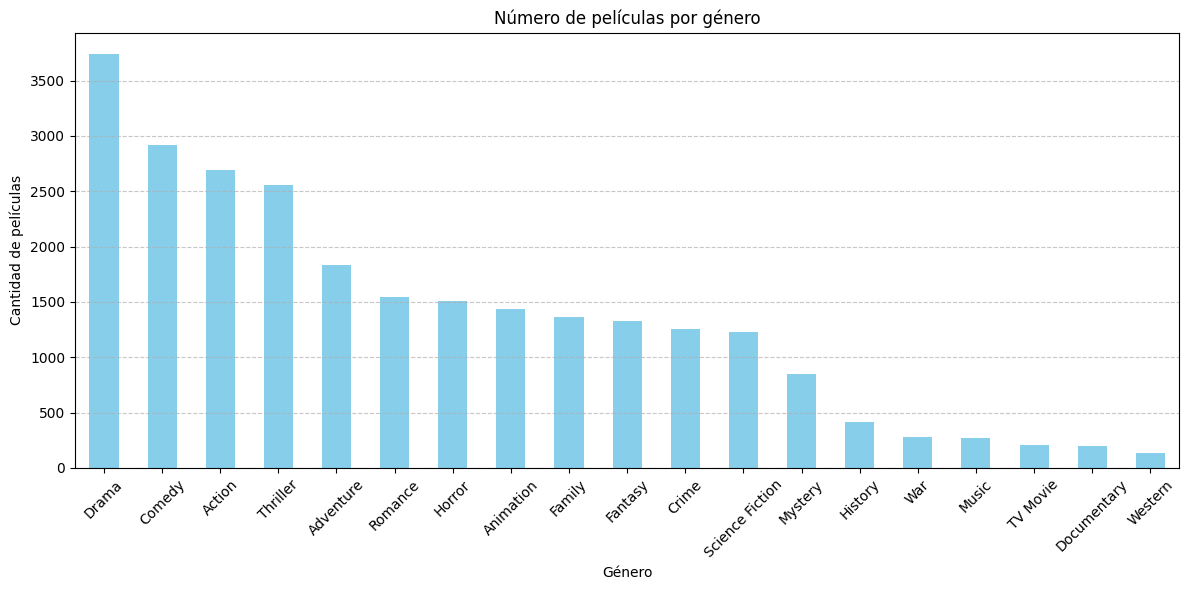

In [ ]:
import matplotlib.pyplot as plt

# Seleccionar solo las columnas de género
genre_columns = [
    'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
    'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery',
    'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'
]

# Contar cuántas veces aparece cada género (sumando los 1s)
genre_counts = df_processed[genre_columns].sum().sort_values(ascending=False)

# Crear gráfico
plt.figure(figsize=(12,6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Número de películas por género')
plt.xlabel('Género')
plt.ylabel('Cantidad de películas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
avg_scores = {
    genre: df_processed[df_processed[genre] == 1]['score'].mean()
    for genre in genre_columns
}

df_avg_scores = pd.DataFrame(list(avg_scores.items()), columns=['Genre', 'Average Score'])
df_avg_scores = df_avg_scores.sort_values('Average Score', ascending=False)

In [ ]:
df_avg_scores

,Genre,Average Score
9,History,69.158768
17,War,69.099644
2,Animation,69.044704
11,Music,68.996364
18,Western,68.007634
7,Family,66.184604
6,Drama,65.982926
8,Fantasy,65.805091
1,Adventure,65.266419
4,Crime,65.129032


In [ ]:
!pip install plotly

import plotly.express as px

# Graficar con Plotly
fig = px.bar(
    df_avg_scores,
    x='Genre',
    y='Average Score',
    title='Score promedio por género',
    text='Average Score',
    labels={'Genre': 'Género', 'Average Score': 'Score Promedio'},
    color='Average Score',
    color_continuous_scale='Blues'
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [ ]:
avg_revenue = {
    genre: df_processed[df_processed[genre] == 1]['revenue'].mean()
    for genre in genre_columns
}

df_avg_revenue = pd.DataFrame(list(avg_revenue.items()), columns=['Genre', 'Average Revenue'])
df_avg_revenue = df_avg_revenue.sort_values('Average Revenue', ascending=False)

In [ ]:
fig = px.bar(
    df_avg_revenue,
    x='Genre',
    y='Average Revenue',
    title='Revenue promedio por género',
    text='Average Revenue',
    labels={'Genre': 'Género', 'Average Revenue': 'Revenue Promedio'},
    color='Average Revenue',
    color_continuous_scale='Greens'
)
fig.update_layout(xaxis_tickangle=-45, yaxis_title='Revenue Promedio (USD)')
fig.show()

# Bag Words de Overview

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from wordcloud import WordCloud

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
def clean_crew_names(crew_entry):
    if pd.isnull(crew_entry):
        return ""
    try:
        names = crew_entry.split(',')
        cleaned_names = [name.strip().replace(' ', '_') for name in names]
        return ','.join(cleaned_names)
    except:
        return ""

# Aplicar limpieza
df_processed['crew'] = df_processed['crew'].apply(clean_crew_names)

In [ ]:
df_processed

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,...,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,profit,name_year
0,Creed III,03/02/2023,73.0,"[Drama, Action]","After dominating the boxing world, Adonis Cree...","Michael_B._Jordan,Adonis_Creed,Tessa_Thompson,...",Creed III,Released,English,75000000.0,...,0,0,0,0,0,0,0,0,1.966167e+08,Creed III (03/02/2023 )
1,Avatar: The Way of Water,12/15/2022,78.0,"[Science Fiction, Adventure, Action]",Set more than a decade after the events of the...,"Sam_Worthington,Jake_Sully,Zoe_Saldaña,Neytiri...",Avatar: The Way of Water,Released,English,460000000.0,...,0,0,0,1,0,0,0,0,1.856795e+09,Avatar: The Way of Water (12/15/2022 )
2,The Super Mario Bros. Movie,04/05/2023,76.0,"[Animation, Adventure, Family, Fantasy, Comedy]","While working underground to fix a water main,...","Chris_Pratt,Mario_(voice),Anya_Taylor-Joy,Prin...",The Super Mario Bros. Movie,Released,English,100000000.0,...,0,0,0,0,0,0,0,0,6.244590e+08,The Super Mario Bros. Movie (04/05/2023 )
3,Mummies,01/05/2023,70.0,"[Animation, Comedy, Family, Adventure, Fantasy]","Through a series of unfortunate events, three ...","Óscar_Barberán,Thut_(voice),Ana_Esther_Alborg,...",Momias,Released,"Spanish, Castilian",12300000.0,...,0,0,0,0,0,0,0,0,2.190000e+07,Mummies (01/05/2023 )
4,Supercell,03/17/2023,61.0,[Action],Good-hearted teenager William always lived in ...,"Skeet_Ulrich,Roy_Cameron,Anne_Heche,Dr_Quinn_B...",Supercell,Released,English,77000000.0,...,0,0,0,0,0,0,0,0,2.639420e+08,Supercell (03/17/2023 )
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,12/28/2016,73.0,[Drama],"In 1979 Santa Barbara, California, Dorothea Fi...","Annette_Bening,Dorothea_Fields,Lucas_Jade_Zuma...",20th Century Women,Released,English,7000000.0,...,0,0,0,0,0,0,0,0,2.353729e+06,20th Century Women (12/28/2016 )
10174,Delta Force 2: The Colombian Connection,08/24/1990,54.0,[Action],When DEA agents are taken captive by a ruthles...,"Chuck_Norris,Col._Scott_McCoy,Billy_Drago,Ramo...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,...,0,0,0,0,0,0,0,0,-2.447457e+06,Delta Force 2: The Colombian Connection (08/24...
10175,The Russia House,12/21/1990,61.0,"[Drama, Thriller, Romance]","Barley Scott Blair, a Lisbon-based editor of R...","Sean_Connery,Bartholomew_'Barley'_Scott_Blair,...",The Russia House,Released,English,21800000.0,...,0,0,1,0,0,1,0,0,1.197992e+06,The Russia House (12/21/1990 )
10176,Darkman II: The Return of Durant,07/11/1995,55.0,"[Action, Adventure, Science Fiction, Thriller,...",Darkman and Durant return and they hate each o...,"Larry_Drake,Robert_G._Durant,Arnold_Vosloo,Dar...",Darkman II: The Return of Durant,Released,English,116000000.0,...,0,0,0,1,0,1,0,0,3.596613e+08,Darkman II: The Return of Durant (07/11/1995 )


In [ ]:
import re

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_and_lemmatize2(text):
    if pd.isnull(text):
        return []

    try:
        text = str(text).lower().replace('.', '_')  # ← punto a subguion

        # Mantener solo letras, subguiones y comas
        text = re.sub(r'[^a-z_,]', '', text)

        tokens = text.split(',')

        tokens = [
            lemmatizer.lemmatize(word)
            for word in tokens
            if word and word not in stop_words
        ]

        return tokens
    except Exception as e:
        print(f"Error procesando texto: {text} | Error: {e}")
        return []

In [ ]:
def clean_and_lemmatize(text):
    if pd.isnull(text):
        return []

    tokens = word_tokenize(text.lower())                              # Tokenizar
    tokens = [word for word in tokens if word.isalpha()]             # Eliminar puntuación
    tokens = [word for word in tokens if word not in stop_words]     # Eliminar stopwords
def clean_and_lemmatize(text):
    if pd.isnull(text):
        return []

    tokens = word_tokenize(text.lower())                              # Tokenizar
    tokens = [word for word in tokens if word.isalpha()]             # Eliminar puntuación
    tokens = [word for word in tokens if word not in stop_words]     # Eliminar stopwords
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]     # Lemmatizar

    return lemmatized

In [ ]:
df_processed['overview_tokens'] = df_processed['overview'].apply(clean_and_lemmatize)

In [ ]:
df_processed['crew_tokens'] = df_processed['crew'].apply(clean_and_lemmatize2)

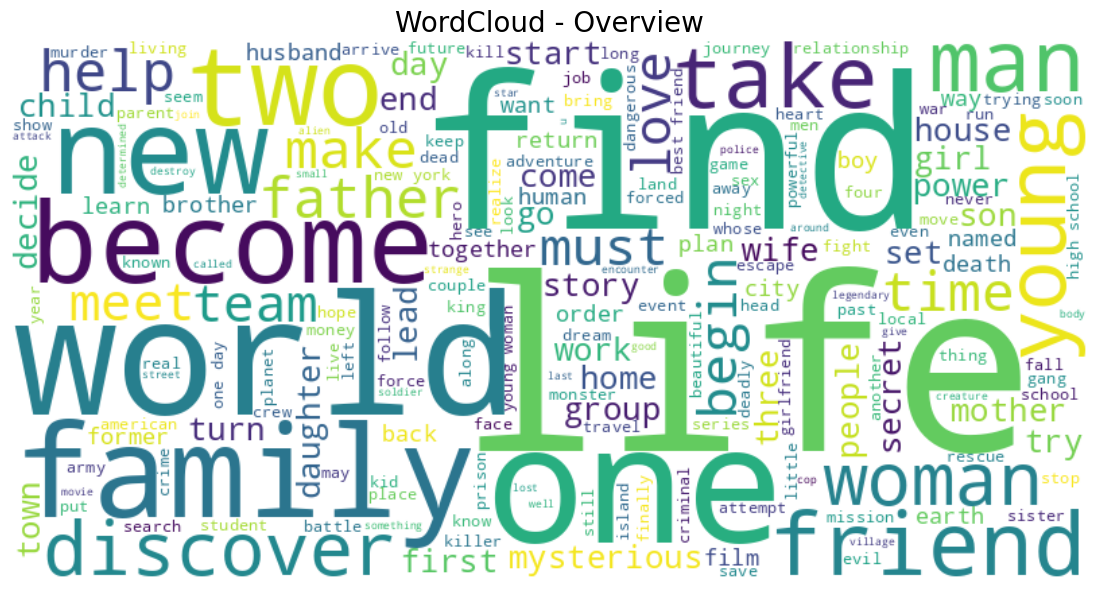

In [ ]:
overview_words = df_processed['overview_tokens'].explode().dropna().tolist()
overview_text = ' '.join(overview_words)

wordcloud_overview = WordCloud(width=800, height=400, background_color='white').generate(overview_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud_overview, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Overview", fontsize=20)
plt.show()

# BagWords Crew

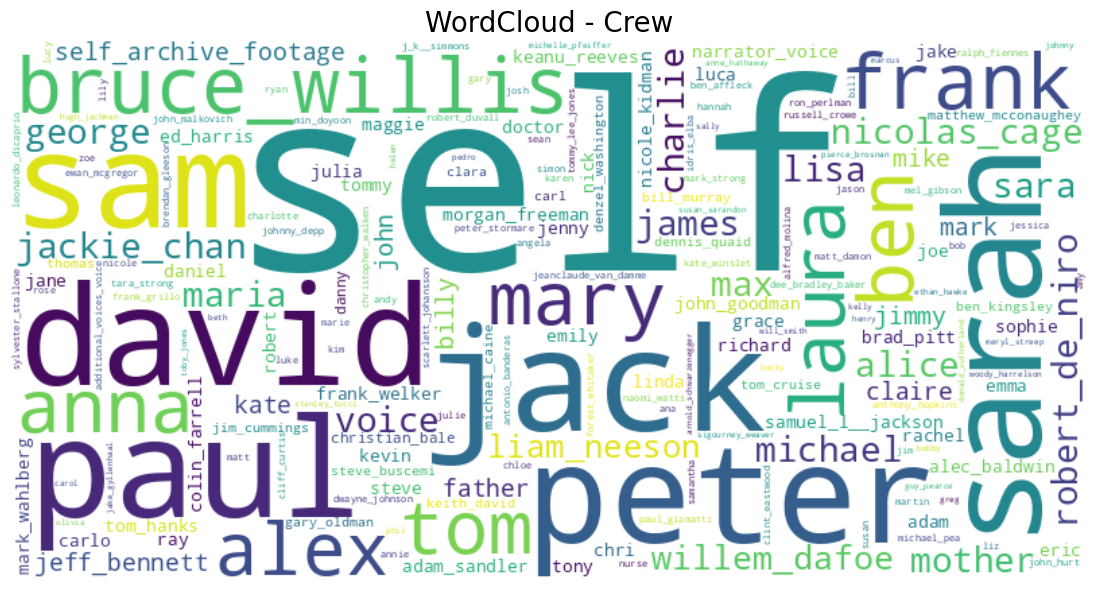

In [ ]:
crew_words = df_processed['crew_tokens'].explode().dropna().tolist()
crew_text = ' '.join(crew_words)

wordcloud_crew = WordCloud(width=800, height=400, background_color='white').generate(crew_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud_crew, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Crew", fontsize=20)
plt.show()

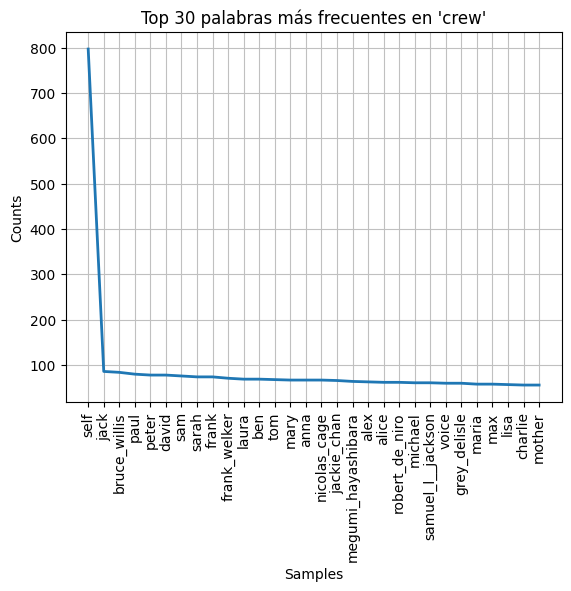

In [ ]:
# Aplanar los tokens de crew en una sola lista
crew_words = df_processed['crew_tokens'].explode().dropna().tolist()

# Crear la distribución de frecuencias
freq_crew = nltk.FreqDist(crew_words)

# Graficar las 30 palabras más comunes
freq_crew.plot(30, cumulative=False)
plt.title("Top 30 palabras más frecuentes en 'crew'")
plt.show()

In [ ]:
custom_stopwords = ['voice','de','self']

# Usa el DataFrame correcto: df_processed
df_processed['crew_tokens'] = df_processed['crew_tokens'].apply(
    lambda tokens: [word for word in tokens if word not in custom_stopwords]
)

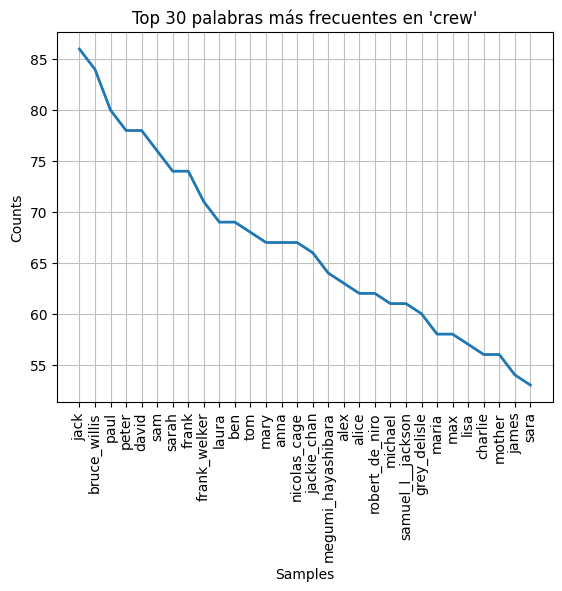

In [ ]:
# Aplanar los tokens de crew en una sola lista
crew_words = df_processed['crew_tokens'].explode().dropna().tolist()

# Crear la distribución de frecuencias
freq_crew = nltk.FreqDist(crew_words)

# Graficar las 30 palabras más comunes
freq_crew.plot(30, cumulative=False)
plt.title("Top 30 palabras más frecuentes en 'crew'")
plt.show()

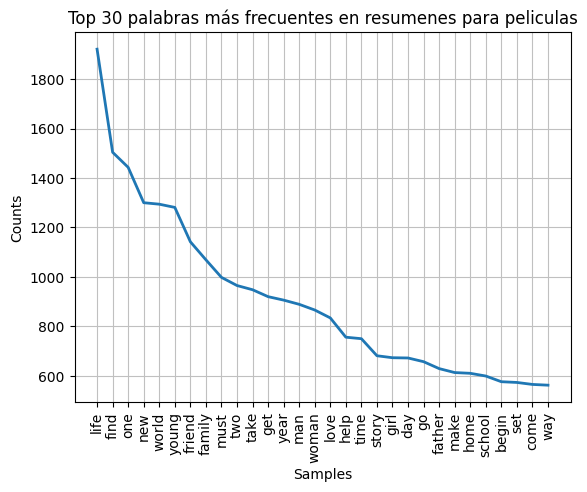

In [ ]:
# Aplanar los tokens de crew en una sola lista
overview_words = df_processed['overview_tokens'].explode().dropna().tolist()

# Crear la distribución de frecuencias
freq_crew = nltk.FreqDist(overview_words)

# Graficar las 30 palabras más comunes
freq_crew.plot(30, cumulative=False)
plt.title("Top 30 palabras más frecuentes en resumenes para peliculas")
plt.show()

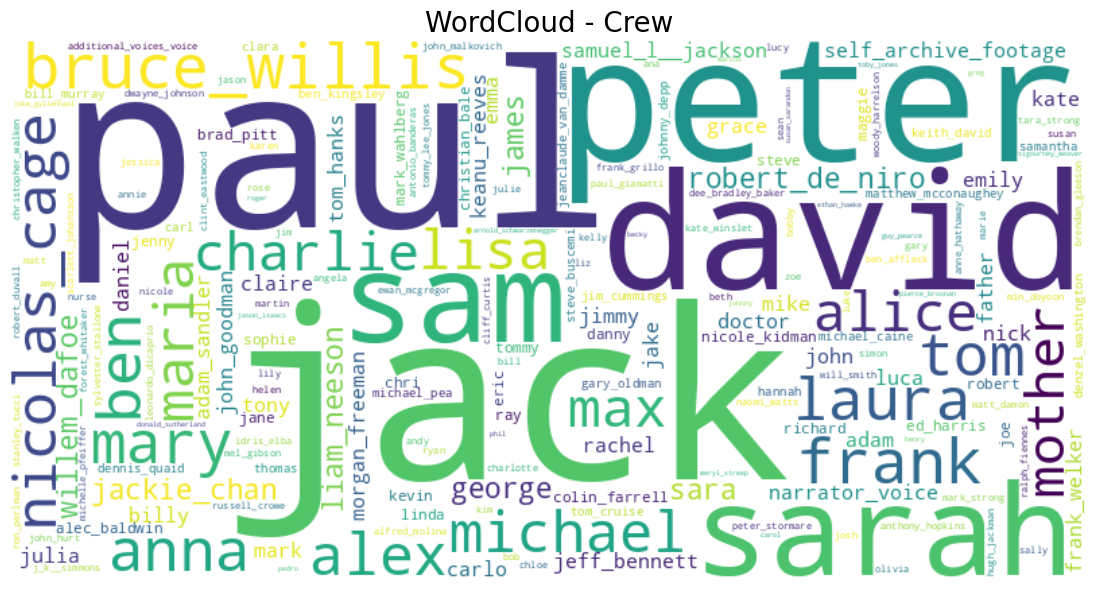

In [ ]:
crew_words = df_processed['crew_tokens'].explode().dropna().tolist()
crew_text = ' '.join(crew_words)

wordcloud_crew = WordCloud(width=800, height=400, background_color='white').generate(crew_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud_crew, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Crew", fontsize=20)
plt.show()

# Relación entre las palabras más usadas y revenue

In [ ]:
from collections import Counter

# Explota todos los nombres (ya con subguiones)
crew_all = df_processed['crew'].dropna().str.split(',').explode().str.lower().tolist()
crew_top10 = [word for word, _ in Counter(crew_all).most_common(10)]
overview_all = df['overview_tokens'].explode().dropna().tolist()
overview_top10 = [word for word, _ in Counter(overview_all).most_common(10)]

In [ ]:
overview_revenue_stats = []

# Ver si cada palabra aparece en el overview y calcular media del revenue
for word in overview_top10:
    df[word + '_present'] = df['overview_tokens'].apply(lambda tokens: word in tokens)
    mean_revenue_with_word = df[df[word + '_present']]['revenue'].mean()
    mean_revenue_without_word = df[~df[word + '_present']]['revenue'].mean()
    overview_revenue_stats.append((word, mean_revenue_with_word, mean_revenue_without_word))

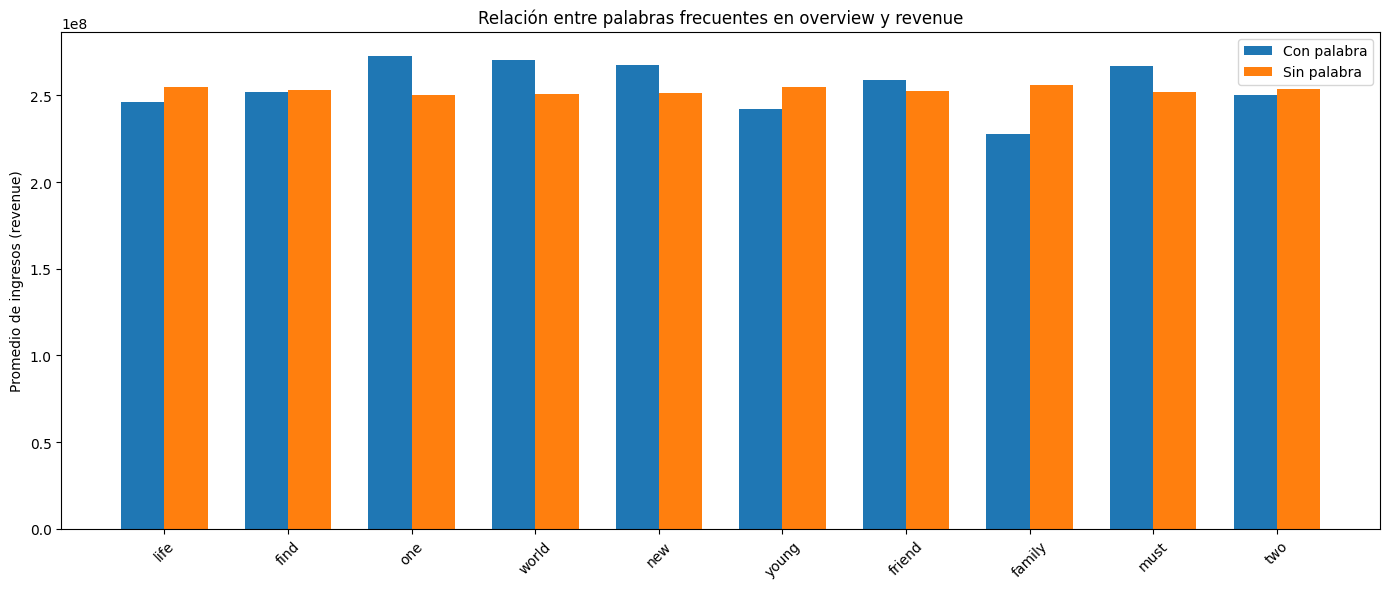

In [ ]:
import numpy as np

words, with_word, without_word = zip(*overview_revenue_stats)

x = np.arange(len(words))
width = 0.35

plt.figure(figsize=(14, 6))
plt.bar(x - width/2, with_word, width, label='Con palabra')
plt.bar(x + width/2, without_word, width, label='Sin palabra')

plt.xticks(x, words, rotation=45)
plt.ylabel('Promedio de ingresos (revenue)')
plt.title('Relación entre palabras frecuentes en overview y revenue')
plt.legend()
plt.tight_layout()
plt.show()

# Matriz de correlación

In [ ]:
numeric_cols = ['score', 'budget_x', 'revenue']
df_numeric = df_processed[numeric_cols]

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot with Plotly
fig = px.imshow(
    corr_matrix,
    text_auto=True,
    color_continuous_scale='RdBu_r',
    zmin=-1, zmax=1,
    title="Correlation Matrix"
)
fig.show()

In [ ]:
fig = px.scatter(
    df_processed,
    x='budget_x',
    y='revenue',
    color='score',
    size='score',
    title='Budget vs Revenue (color and size by Score)',
    labels={'budget_x': 'Budget', 'revenue': 'Revenue', 'score': 'Score'})
fig.show()

In [ ]:
fig = px.scatter(
    df_processed,
    x='score',
    y='revenue',
    size='score',
    title='Score vs Revenue',
    labels={'Score': 'Score', 'revenue': 'Revenue'})
fig.show()

# Distribución de las 100 peliculas que más recaudaron

In [ ]:
df_best_movies = df_processed.sort_values(by='revenue', ascending=False)
top_100_revenue_movies = df_best_movies.head(100)

country_counts = top_100_revenue_movies['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

fig = px.treemap(
    country_counts,
    path=['country'],
    values='count',
    title='Distribution of Top 100 Revenue Movies by Country',
    color='count',
    color_continuous_scale='Blues'
)

fig.show()

# Top 15 peliculas que más recaudaron

In [ ]:
fig = px.bar(
    df_best_movies[:15],
    x='names',
    y='revenue',
    title='Top 15 Movies by Revenue',
    labels={'names': 'Movie Title', 'revenue': 'Revenue'},
    text='revenue'
)

fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [ ]:
# prompt: muestrame la pelicula con nombre Titanic y The Lion King

df_processed[(df_processed['names'] == 'Titanic') | (df_processed['names'] == 'The Lion King')]

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
309,Titanic,12/18/1997,79.0,"[Drama, Romance]",101-year-old Rose DeWitt Bukater tells the sto...,"Leonardo DiCaprio, Jack Dawson, Kate Winslet, ...",Titanic,Released,English,200000000.0,...,0,0,0,0,1,0,0,0,0,0
327,The Lion King,08/25/1994,83.0,"[Family, Animation, Drama]",A young lion prince is cast out of his pride b...,"Matthew Broderick, Simba (voice), James Earl J...",The Lion King,Released,English,260000000.0,...,0,0,0,0,0,0,0,0,0,0
471,The Lion King,07/17/2019,71.0,"[Adventure, Drama, Family]","Simba idolizes his father, King Mufasa, and ta...","Chiwetel Ejiofor, Scar (voice), John Oliver, Z...",The Lion King,Released,English,260000000.0,...,0,0,0,0,0,0,0,0,0,0
6670,Titanic,04/11/1953,66.0,"[Drama, Romance]","Unhappily married, Julia Sturges decides to go...","Clifton Webb, Richard Ward Sturges, Barbara St...",Titanic,Released,English,200000000.0,...,0,0,0,0,1,0,0,0,0,0


Estas peliculas han sido filmadas en distintos años y con diferentes elencos por eso no fueron eliminadas, sin embargo su revenue es el mismo lo cual es poco probable. Pero optamos por no eliminarlas para este primer análisis.

In [ ]:
# Eliminar duplicados por nombre y revenue
df_unique = df_best_movies.drop_duplicates(subset=['names', 'revenue'])

# Escalar revenue a millones y redondear
df_unique['revenue_millions'] = (df_unique['revenue'] / 1e6).round(2)

# Top 15 películas por revenue
df_top15 = df_unique.sort_values(by='revenue', ascending=False).head(15)

# Gráfico con altura aumentada
fig = px.bar(
    df_top15,
    x='names',
    y='revenue_millions',
    title='Top 15 Movies by Revenue (in Millions)',
    labels={'names': 'Movie Title', 'revenue_millions': 'Revenue (Millions)'},
    text='revenue_millions',
    height=600  # ← Ajusta la altura aquí (puedes subir más si necesitas)
)

fig.update_traces(texttemplate='%{text:.2f}M', textposition='outside')
fig.update_layout(xaxis_tickangle=-45, yaxis_title='Revenue (Millions USD)')
fig.show()

<ipython-input-145-b45ce7af0d7e>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# ¿Qué peliculas tuvieron mayor Profit (Utilidades)?

In [ ]:
df_processed['profit'] = df_processed['revenue'] - df_processed['budget_x']
df_processed['name_year'] = df_processed['names'] + ' (' + df_processed['date_x'].astype(str) + ')'
top_profit_movies = df_processed.sort_values(by='profit', ascending=False).head(20)

fig = px.bar(
    top_profit_movies,
    x='name_year',
    y='profit',
    title='Top 20 Movies by Profit',
    labels={'name_year': 'Movie Title (Year)', 'profit': 'Profit'},
    text='profit',
    color='profit',
    color_continuous_scale='Cividis'
)

fig.update_layout(
    xaxis_tickangle=-45,
    height=700
)

fig.show()

# ¿Qué peliculas tuvieron peor Profit (Utilidades)?

In [ ]:
df_processed['profit'] = df_processed['revenue'] - df_processed['budget_x']
df_processed['name_year'] = df_processed['names'] + ' (' + df_processed['date_x'].astype(str) + ')'
top_profit_movies = df_processed.sort_values(by='profit', ascending=False).tail(20)

fig = px.bar(
    top_profit_movies,
    x='name_year',
    y='profit',
    title='Top 20 Worst Movies by Profit',
    labels={'name_year': 'Movie Title (Year)', 'profit': 'Profit'},
    text='profit',
    color='profit',
    color_continuous_scale='Cividis'
)

fig.update_layout(
    xaxis_tickangle=-45,
    height=700
)


# Conclusiones

Basado en el análisis exploratorio de datos realizado, se pueden extraer las siguientes conclusiones clave:

*1. Limpieza de Datos:*
- Se identificaron y manejaron valores nulos, optando por eliminar filas que contenían datos faltantes para asegurar la calidad del análisis.
- Se detectaron y eliminaron duplicados significativos basados en la combinación de nombre de la película, fecha de estreno y equipo técnico ('crew'), lo que indica posibles registros repetidos o inconsistencias en la base de datos.

*2. Distribución de Géneros:*
- El género más frecuente en el conjunto de datos es el Drama, seguido por la Acción, la Comedia y el Thriller. Esto sugiere que la muestra está dominada por estos tipos de películas.
- El análisis del score promedio por género muestra variaciones interesantes, destacando que ciertos géneros como Documental o Historia pueden tener scores promedio más altos, aunque la cantidad de películas en estos géneros sea menor. El Romance y la Familia parecen tener scores promedio más bajos en esta muestra.
- En cuanto al revenue promedio, los géneros como Ciencia Ficción, Aventura y Acción lideran la recaudación, lo cual es esperable dado que suelen ser producciones de gran presupuesto y alcance global.

*3. Análisis de Texto (Bag of Words):*
- La nube de palabras generada a partir de los resúmenes ('overview') muestra términos comunes relacionados con la trama de las películas, como 'life', 'world', 'story', 'family', entre otros.
- La nube de palabras y la distribución de frecuencias del campo 'crew' (equipo técnico) revelan los nombres y roles más frecuentes. Se realizó una limpieza para estandarizar nombres y eliminar palabras irrelevantes. Este análisis puede ser útil para identificar individuos o roles clave en la industria.

*4. Relación entre Variables Numéricas:*
- La matriz de correlación muestra una correlación positiva moderada entre el presupuesto ('budget_x') y los ingresos ('revenue'), lo cual es intuitivo: películas con mayor presupuesto tienden a generar mayores ingresos, aunque la relación no es lineal perfecta.
- La correlación entre el score y el revenue es débil, indicando que una alta calificación no garantiza necesariamente una alta recaudación, y viceversa.
- Los gráficos de dispersión confirman visualmente estas relaciones, mostrando una tendencia general de mayor revenue con mayor budget, pero con una dispersión considerable. La relación entre score y revenue es menos clara.

*5. Desempeño Financiero (Revenue y Profit):*
- El análisis de las 100 películas con mayor recaudación revela una concentración geográfica significativa, siendo Estados Unidos el país con el mayor número de producciones en este segmento.
- El ranking de las 15 películas con mayor revenue destaca producciones de gran escala, muchas de las cuales son franquicias conocidas o películas icónicas.
- El análisis del profit (ingresos menos presupuesto) proporciona una perspectiva diferente sobre el éxito financiero. Películas con menor revenue absoluto pueden tener un profit alto si su presupuesto fue significativamente menor. Se identificaron las películas más rentables y las menos rentables, evidenciando que un alto presupuesto no siempre se traduce en alta rentabilidad.

*Consideraciones Adicionales:*
- La presencia de registros duplicados para 'Titanic' y 'The Lion King' con el mismo revenue a pesar de diferencias en el año y crew podría indicar problemas en la fuente de datos o la consolidación de información sobre remakes/versiones diferentes. Aunque se optó por no eliminarlas para este análisis inicial, es un punto a considerar en análisis futuros.
- La información sobre el 'crew' podría beneficiarse de una estructura más detallada (ej. director, actor principal, etc.) para un análisis más granular del impacto individual en el desempeño de la película.

En resumen, este análisis exploratorio proporciona una visión general de las tendencias en los géneros de películas, la relación entre presupuesto, score y revenue, y el desempeño financiero de las películas en el conjunto de datos. Los hallazgos pueden servir como base para análisis predictivos o de recomendación más avanzados.
